## Detecting alzheimers through MRI scans by using ANN and CNN models

Name - Shrestha Srivastava

Roll no.- 20260

Department - Data Science and Engineering


## Overview

In this project I have analysed two deep learning models to check their accuracy on detecting the type of
dementia in alzheimer patients 

## Research Question 

The main inspiration or research question for this project is determining or helping in defining a good machine 
learning model for early stage alzheimer prediction through the onset stage of dementia. Dementia is often closely 
related to alzheimer. Therefore through this project we can identify a good model which is capable of detecting 
dementia at earlier stages.

## Background and Prior Work

Since Alzheimer is a vast problem among researchers therefore many papers on Alzheimer detection can be found such as 

Mirzaei, Golrokh, Anahita Adeli, and Hojjat Adeli. "Imaging and machine learning techniques for diagnosis of Alzheimer’s disease." Reviews in the Neurosciences 27.8 (2016): 857-870.

In which many state of the art models have been deployed to study the biomarker activity in MRI scans of Patients suffering from Alzheimer

Another major paper published in 2020 

Yamanakkanavar, Nagaraj, Jae Young Choi, and Bumshik Lee. "MRI segmentation and classification of human brain using deep learning for diagnosis of Alzheimer’s disease: a survey." Sensors 20.11 (2020): 3243.

Studies the various MRI images of different segments of the brain using various convolution neural network architectures for the quantitative analysis of brain MRI for the diagnosis of AD

## Hypothesis 

Through this project we create a model which can detect different stages of dementia in an Alzheimer's patient by looking at his MRI brain scans. In this project we will also show Convolutional Neural Networks are way better than the ordinary feed forward network in terms of image classification

## Dataset 

The data is taken from the kaggle website. The free data of MRI scans are available on either Kaggle or OASIS dataset 

The dataset contains 4 classes 
Mild Dementia

Very mild dementia

Moderate dementia 

Non Dementia

And in each class we have its respective libraries 

Importing the necessary libraries 

In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf


import os


import copy
import warnings
warnings.filterwarnings('ignore')

import cv2

import matplotlib
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from math import ceil
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image



import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

2022-11-25 04:22:44.973086: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-25 04:22:46.115134: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-25 04:22:46.115280: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-25 04:22:46.115287: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

## Data Preprocessing

Setting the path and using splitfolder to divide our image folders into training testing and splitting

In [2]:
path='Desktop/Dataset' # dataset location on the system

# splitting our folder into training testing and validation

import splitfolders


splitfolders.ratio(path,ratio=(0.7,0.20,0.10))

Copying files: 6400 files [00:01, 4758.15 files/s]


In [3]:
# getting our data into jupyter with the help of tensorflow

train_data = tf.keras.preprocessing.image_dataset_from_directory('output/train',validation_split=0.2,image_size=(224,224),
                                                                 batch_size=32,subset='training',seed=1000 )

test_data = tf.keras.preprocessing.image_dataset_from_directory('output/test',validation_split=0.2,image_size=(224,224),
                                                                 batch_size=32,subset='training',seed=1000 )


val_data = tf.keras.preprocessing.image_dataset_from_directory('output/val',validation_split=0.2,
                                                               image_size=(224,224), batch_size=32,subset='validation', seed=1000 )

Found 4479 files belonging to 4 classes.
Using 3584 files for training.
Found 642 files belonging to 4 classes.
Using 514 files for training.
Found 1921 files belonging to 4 classes.
Using 384 files for validation.


2022-11-25 04:22:52.482090: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 04:22:52.536358: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/shrestha/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-25 04:22:52.536383: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-11-25 04:22:52.537984: I tensorflow/core/platfo

In [4]:
# defining image labels 

label = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']

# giving labels to our training and validation data 

train_data.class_names = label
val_data.class_names = label


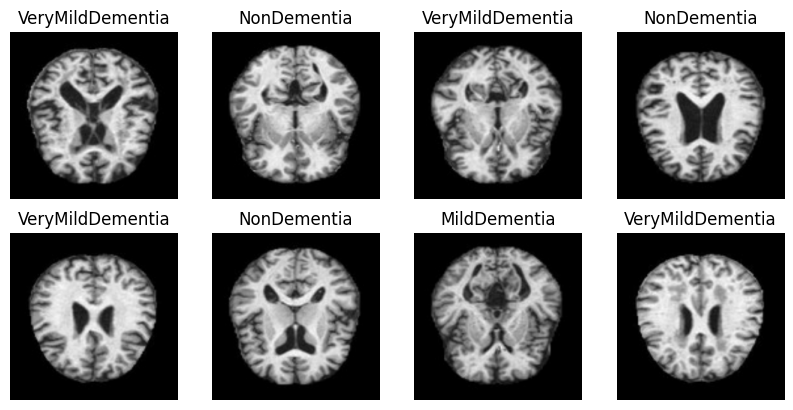

In [5]:
# plotting our images 


plt.figure(figsize=(10, 10))
for images, labels in train_data.take(4):
    for i in range(8):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_data.class_names[labels[i]])
        plt.axis("off")

## Predictive Analysis

## Feed Forward Neural Networks 

Here I have created a general feed forward neural network to classify the images. The Feed forward neural networks are not a good choice for the image classification task. 

In [19]:
model = Sequential()
model.add(Flatten(input_shape=(224,224,3)))  # reduces the dimensions of the image and takes it as a single array
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4))
model.add(Activation('softmax'))

# compiling the model 

model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=["accuracy"])

# Fitting the data into our model
              
history=model.fit(train_data,validation_data = val_data,batch_size=32,epochs = 8,verbose = 1)

Epoch 1/8
112/112 [==============================] - 21s 179ms/step - loss: 37.5042 - accuracy: 0.4662 - val_loss: 1.3297 - val_accuracy: 0.5078
Epoch 2/8
112/112 [==============================] - 20s 178ms/step - loss: 1.3017 - accuracy: 0.4969 - val_loss: 1.2789 - val_accuracy: 0.5078
Epoch 3/8
112/112 [==============================] - 20s 177ms/step - loss: 1.2549 - accuracy: 0.4969 - val_loss: 1.2386 - val_accuracy: 0.5078
Epoch 4/8
112/112 [==============================] - 20s 176ms/step - loss: 1.2177 - accuracy: 0.4969 - val_loss: 1.2065 - val_accuracy: 0.5078
Epoch 5/8
112/112 [==============================] - 20s 177ms/step - loss: 1.1883 - accuracy: 0.4969 - val_loss: 1.1814 - val_accuracy: 0.5078
Epoch 6/8
112/112 [==============================] - 20s 177ms/step - loss: 1.1648 - accuracy: 0.4969 - val_loss: 1.1613 - val_accuracy: 0.5078
Epoch 7/8
112/112 [==============================] - 20s 181ms/step - loss: 1.1460 - accuracy: 0.4969 - val_loss: 1.1454 - val_accuracy

In our model we have total of 6 layers. Given below is the model summary

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_8 (Dense)             (None, 64)                9633856   
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 8)                 264       
                                                                 
 dense_11 (Dense)            (None, 4)                 36        
                                                                 
 activation_2 (Activation)   (None, 4)                 0         
                                                                 
Total params: 9,636,236
Trainable params: 9,636,236
No

If we see the accuracy graph or the output generated by the model we can see that the accuracy does not change throughout. We have taken the value of epochs low to reduce the time taken by the algorithm to run. Value of epochs can be increased for better output accuracy. 

Text(0, 0.5, 'Value')

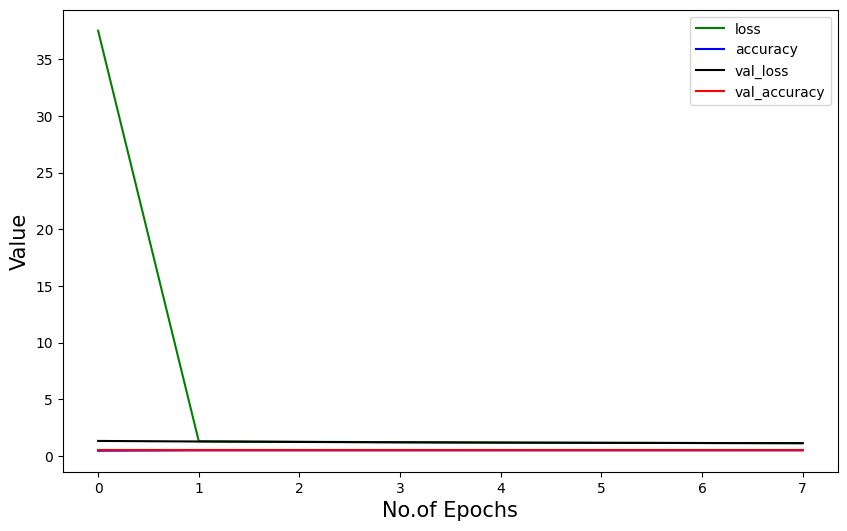

In [21]:
# Plotting the loss, validation accuracy, accuracy, validation loss
model_loss = pd.DataFrame(model.history.history)
loss_plot=model_loss.plot(color = ["g","b","black","r"],figsize = (10,6))
loss_plot.set_xlabel("No.of Epochs",fontdict={'fontsize':15})
loss_plot.set_ylabel("Value",fontdict={"fontsize":15})






Here is the code for displaying a small number of images and whether they were correctly classified or not

Found 642 files belonging to 4 classes.
1/1 [==============================] - 0s 19ms/step


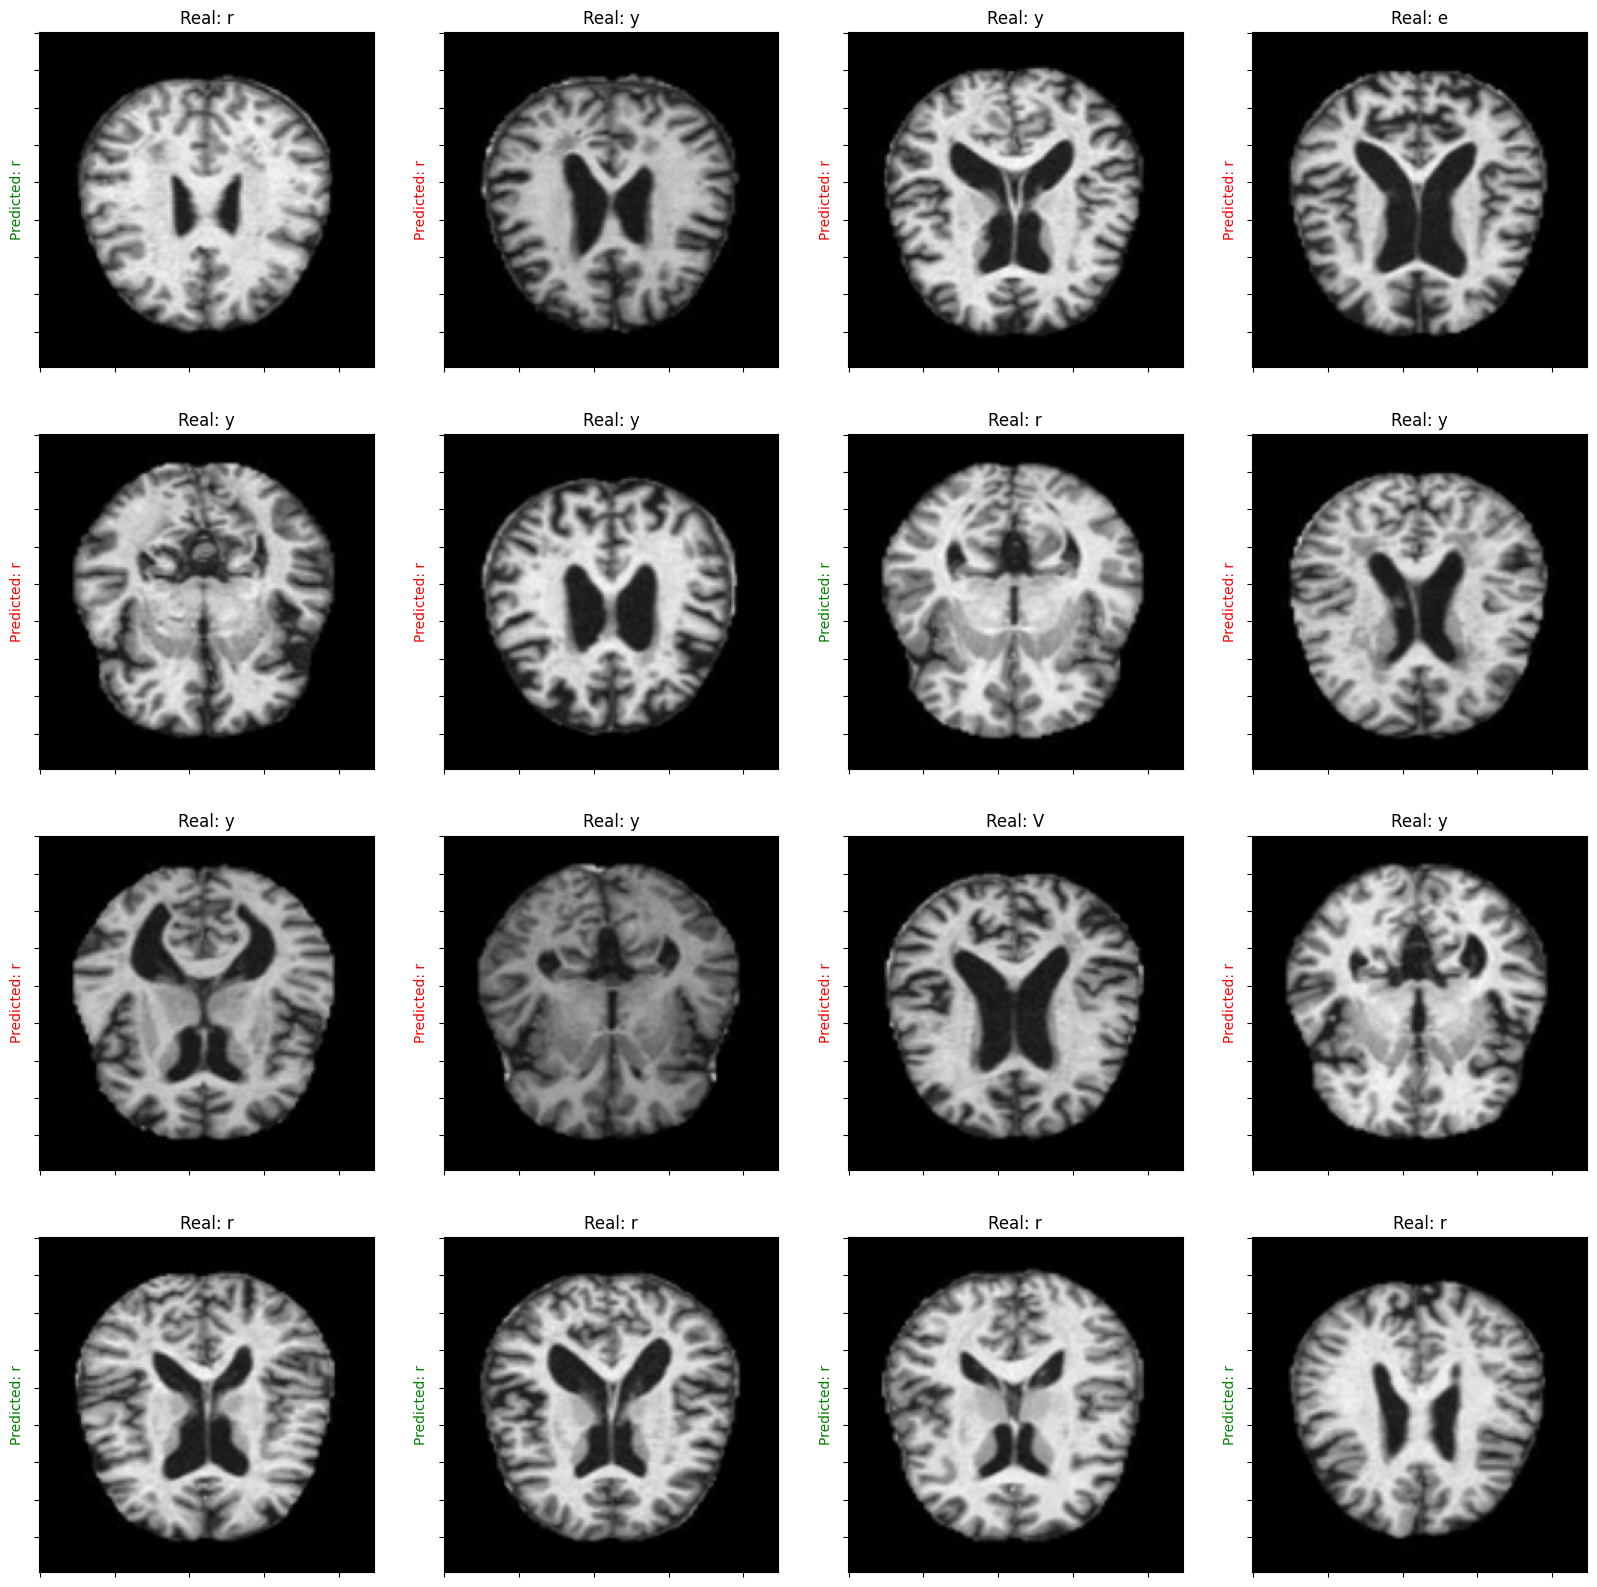

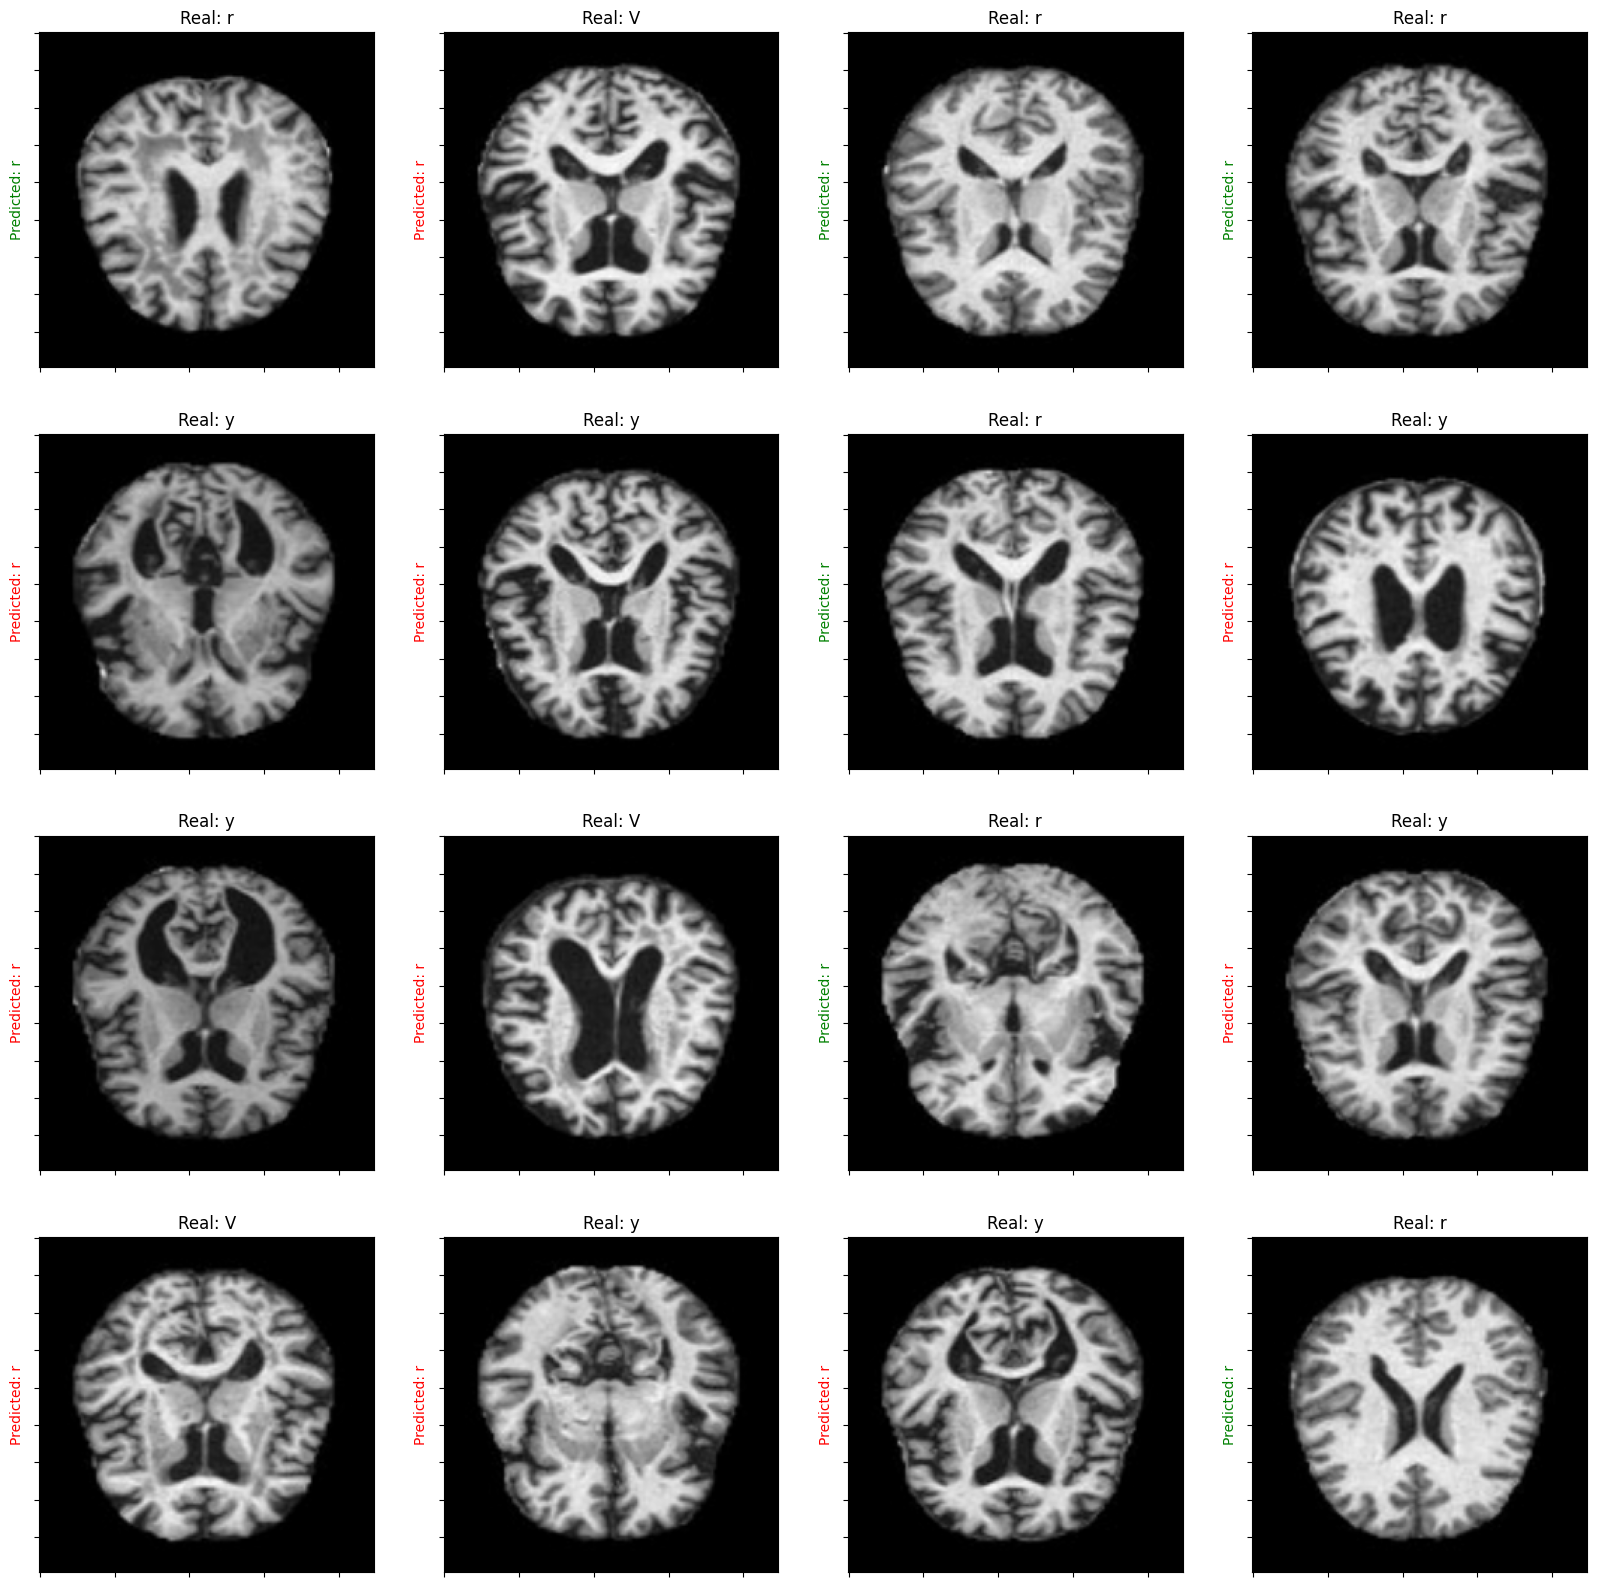

In [22]:

test_data = tf.keras.preprocessing.image_dataset_from_directory('output/test',image_size=(224,224),
                                                                batch_size=32,seed=1000 )

## predicting the type of dementia based on the model created 
plt.figure(figsize=(20, 20))
for images, labels in test_data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(label[labels[i]]==label[np.argmax(score)]):
            plt.title("Real: "+label[labels[i]])
            plt.ylabel("Predicted: "+label[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Real: "+label[labels[i]])
            plt.ylabel("Predicted: "+label[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

        
plt.figure(figsize=(20, 20))
for images, labels in test_data.take(2):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(label[labels[i]]==label[np.argmax(score)]):
            plt.title("Real: "+label[labels[i]])
            plt.ylabel("Predicted: "+label[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Real: "+label[labels[i]])
            plt.ylabel("Predicted: "+label[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])
        

## SCROLL DOWN THE BELOW OUTPUTS TO SEE IMAGES

In [11]:
test_data = tf.keras.preprocessing.image_dataset_from_directory('output/test',image_size=(224,224),batch_size=32,shuffle = False )

autotune = tf.data.experimental.AUTOTUNE

def one_hot_label(image, label):
    label = tf.one_hot(label, 4)
    return image, label


test_data = test_data.map(one_hot_label, num_parallel_calls=autotune)
test_data = test_data.cache().prefetch(buffer_size=autotune)

Found 642 files belonging to 4 classes.


In [23]:
test_images = []
lbl = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
for label in lbl:
    dir_name = "/home/shrestha/output/test/" + label
    test_images.append(len([name for name in os.listdir(dir_name)]))

In [24]:
# targets list
targets=[]
for i in range(0, len(test_images)):
    targets+=[i]*test_images[i]
targets=np.asarray(targets)
test_images, targets
targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [25]:
pred = model.predict(test_data)
np.argmax(pred, axis=1)

21/21 [==============================] - 0s 16ms/step


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [26]:

from sklearn.metrics import classification_report
print(classification_report(targets, np.argmax(pred, axis=1), target_names=lbl))


                    precision    recall  f1-score   support

     Mild_Demented       0.00      0.00      0.00        90
 Moderate_Demented       0.00      0.00      0.00         8
      Non_Demented       0.50      1.00      0.67       320
Very_Mild_Demented       0.00      0.00      0.00       224

          accuracy                           0.50       642
         macro avg       0.12      0.25      0.17       642
      weighted avg       0.25      0.50      0.33       642



In [27]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=targets , y_pred= np.argmax(pred, axis=1))
print(confusion)

[[  0   0  90   0]
 [  0   0   8   0]
 [  0   0 320   0]
 [  0   0 224   0]]


Text(0.5, 1.0, 'Confusion matrix detection of dementia stage')

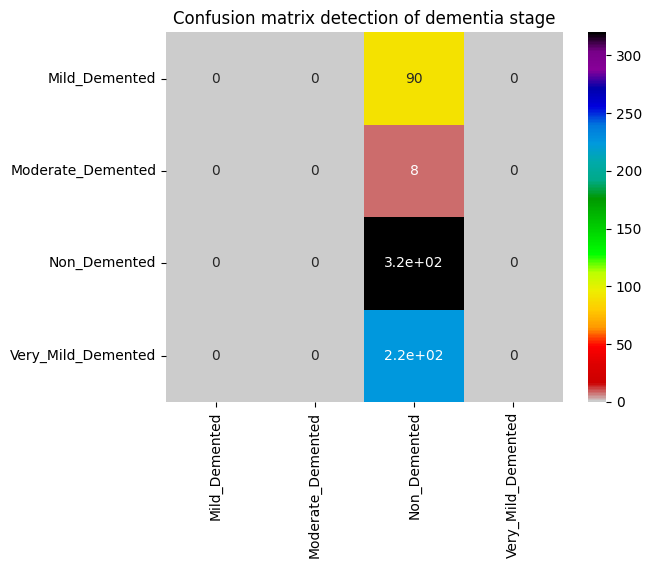

In [28]:
import seaborn as sns

plt.figure()

conf = sns.heatmap(confusion, xticklabels= lbl, yticklabels=lbl,annot = True, cmap = "nipy_spectral_r")

conf.set_title("Confusion matrix detection of dementia stage")

## Convolution Neural Network

The convolution neural networks or CNN are deep learning models that are best used for image classification and detection. These are in the form of multidimensional perceptron layers through which a convolution kernel and pooling kernel are applied to extract important features from the image and later classify them. 


In our case the program is only being run on 8 epochs because due to the large size of our dataset it will take a lot of time if epochs are increased

In [14]:
# Building our CNN model

from tensorflow.keras import layers
img_h = 224
img_w = 224

model2 = tf.keras.Sequential([
    
    layers.Rescaling(1./255, input_shape=(img_h, img_w, 3)),
    
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Dropout(0.5),
  layers.Flatten(),
    
  layers.Dense(128, activation='relu'),
  layers.Dense(4,activation="softmax")
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 8)       1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 8)        

In [15]:
model2.compile(optimizer="Adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

history = model2.fit(train_data, validation_data=val_data,batch_size=32, epochs=8)

Epoch 1/8
112/112 [==============================] - 58s 508ms/step - loss: 1.0437 - accuracy: 0.4983 - val_loss: 1.0215 - val_accuracy: 0.5312
Epoch 2/8
112/112 [==============================] - 57s 507ms/step - loss: 0.9550 - accuracy: 0.5374 - val_loss: 0.8989 - val_accuracy: 0.5859
Epoch 3/8
112/112 [==============================] - 57s 507ms/step - loss: 0.8798 - accuracy: 0.5957 - val_loss: 0.7979 - val_accuracy: 0.6667
Epoch 4/8
112/112 [==============================] - 57s 506ms/step - loss: 0.7812 - accuracy: 0.6378 - val_loss: 0.6977 - val_accuracy: 0.7135
Epoch 5/8
112/112 [==============================] - 56s 504ms/step - loss: 0.7072 - accuracy: 0.6864 - val_loss: 0.5898 - val_accuracy: 0.7604
Epoch 6/8
112/112 [==============================] - 57s 509ms/step - loss: 0.6336 - accuracy: 0.7249 - val_loss: 0.5517 - val_accuracy: 0.7682
Epoch 7/8
112/112 [==============================] - 57s 507ms/step - loss: 0.5749 - accuracy: 0.7497 - val_loss: 0.4326 - val_accuracy:

From this model we can see that CNN performs exceptionally well as compared to our previous Feed forward model. 

Text(0, 0.5, 'Value')

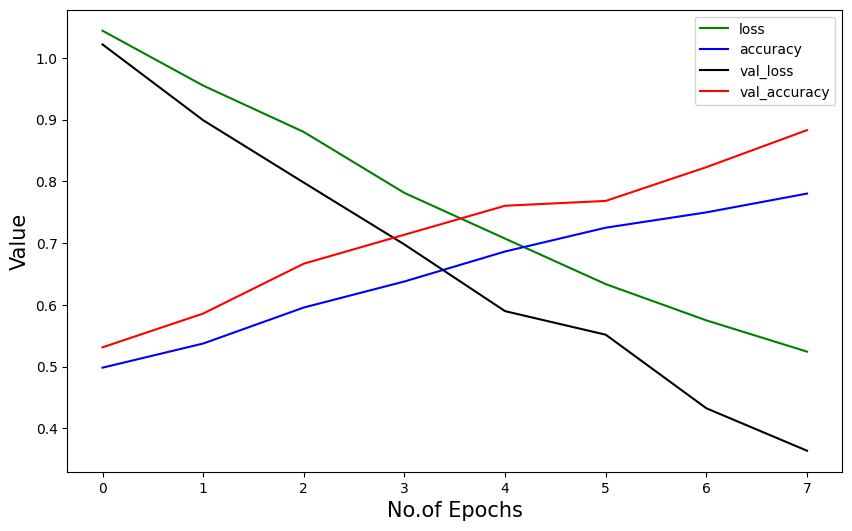

In [16]:
# Plotting the loss, validation accuracy, accuracy, validation loss
model_loss2 = pd.DataFrame(model2.history.history)
loss_plot=model_loss2.plot(color = ["g","b","black","r"],figsize = (10,6))
loss_plot.set_xlabel("No.of Epochs",fontdict={'fontsize':15})
loss_plot.set_ylabel("Value",fontdict={"fontsize":15})

1/1 [==============================] - 0s 20ms/step


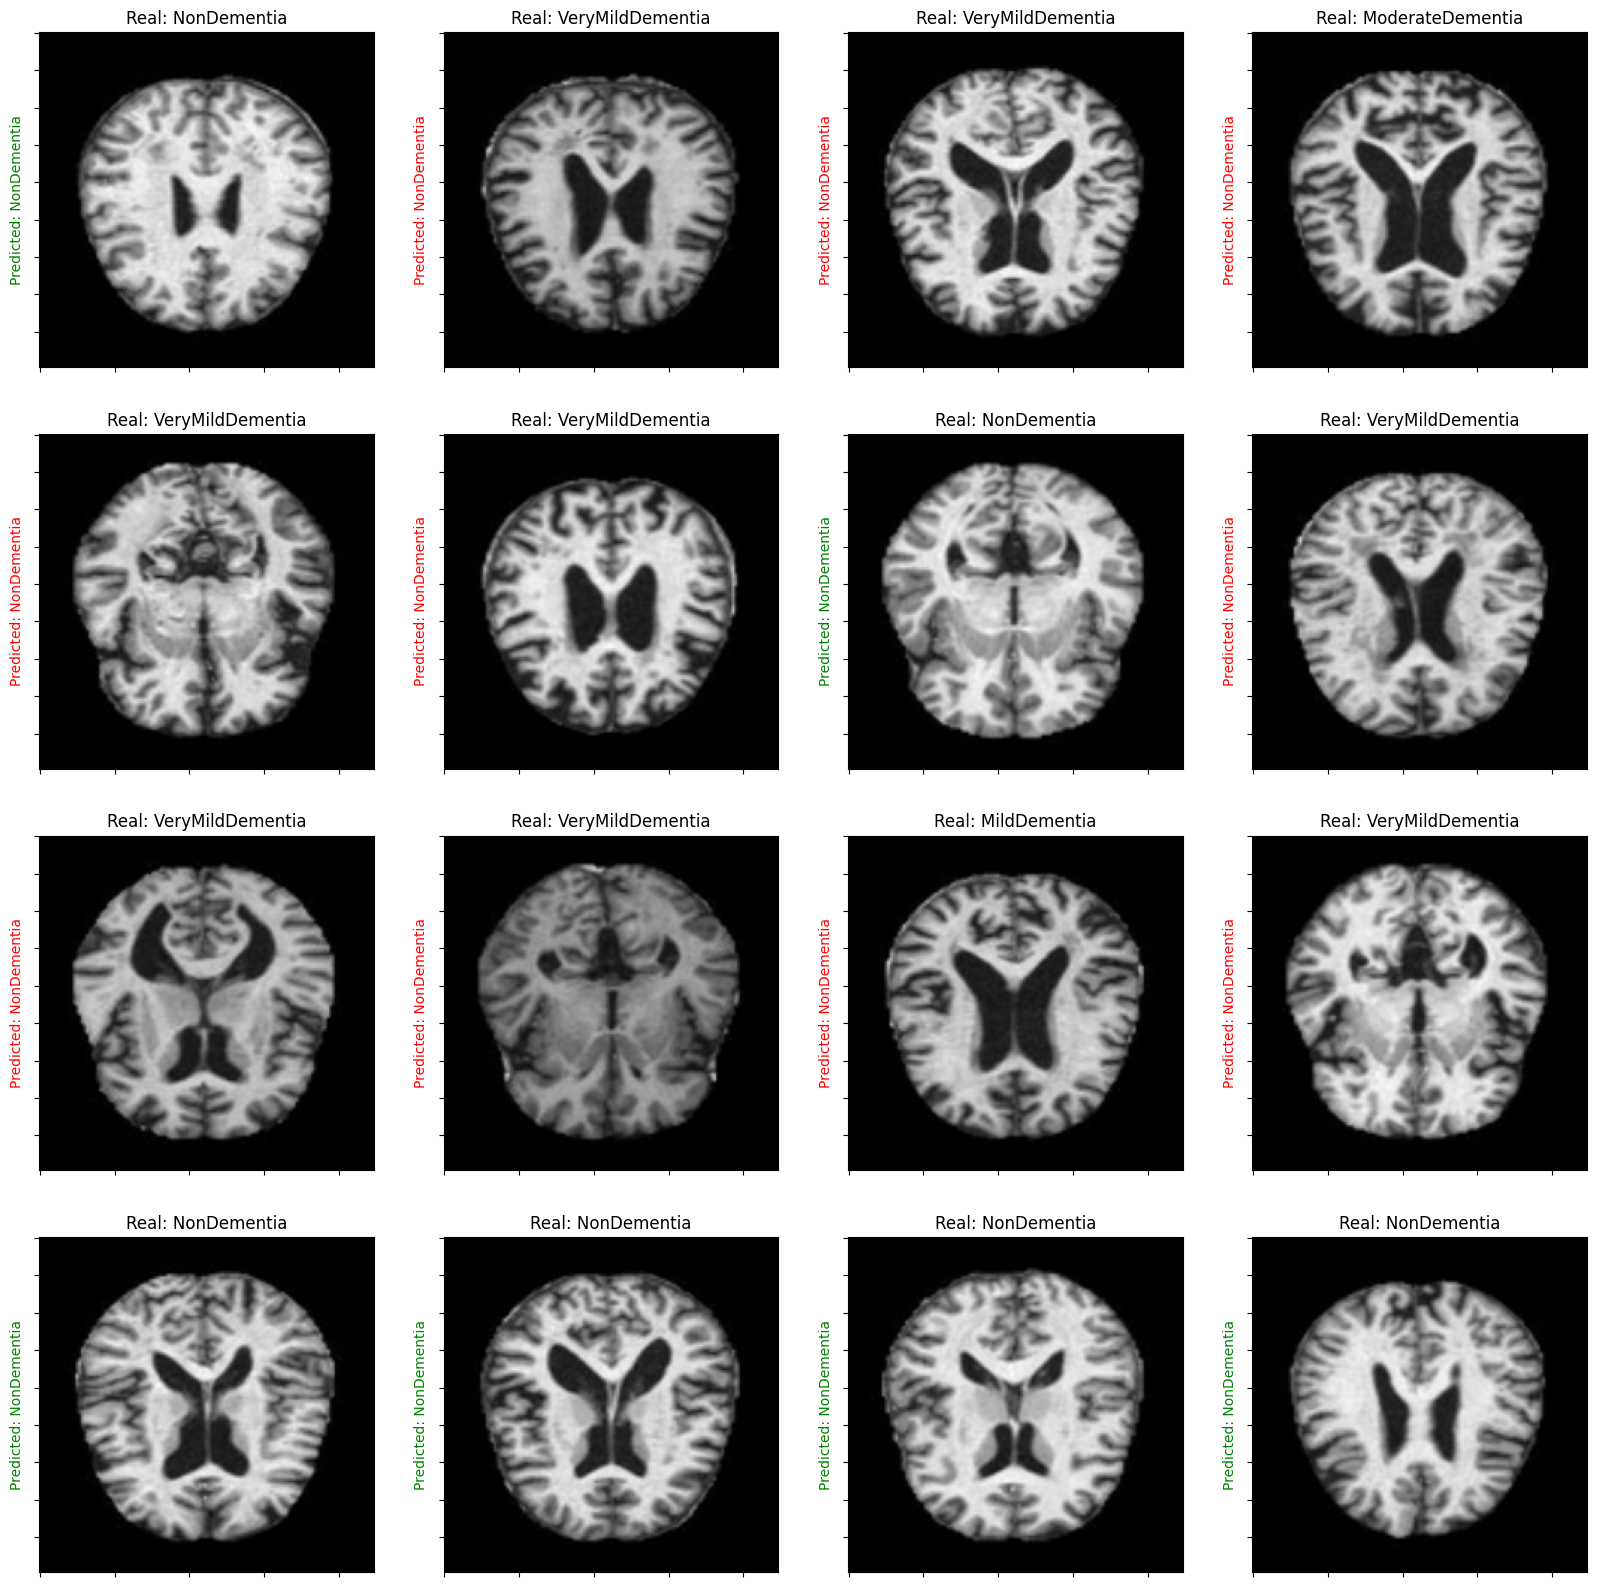

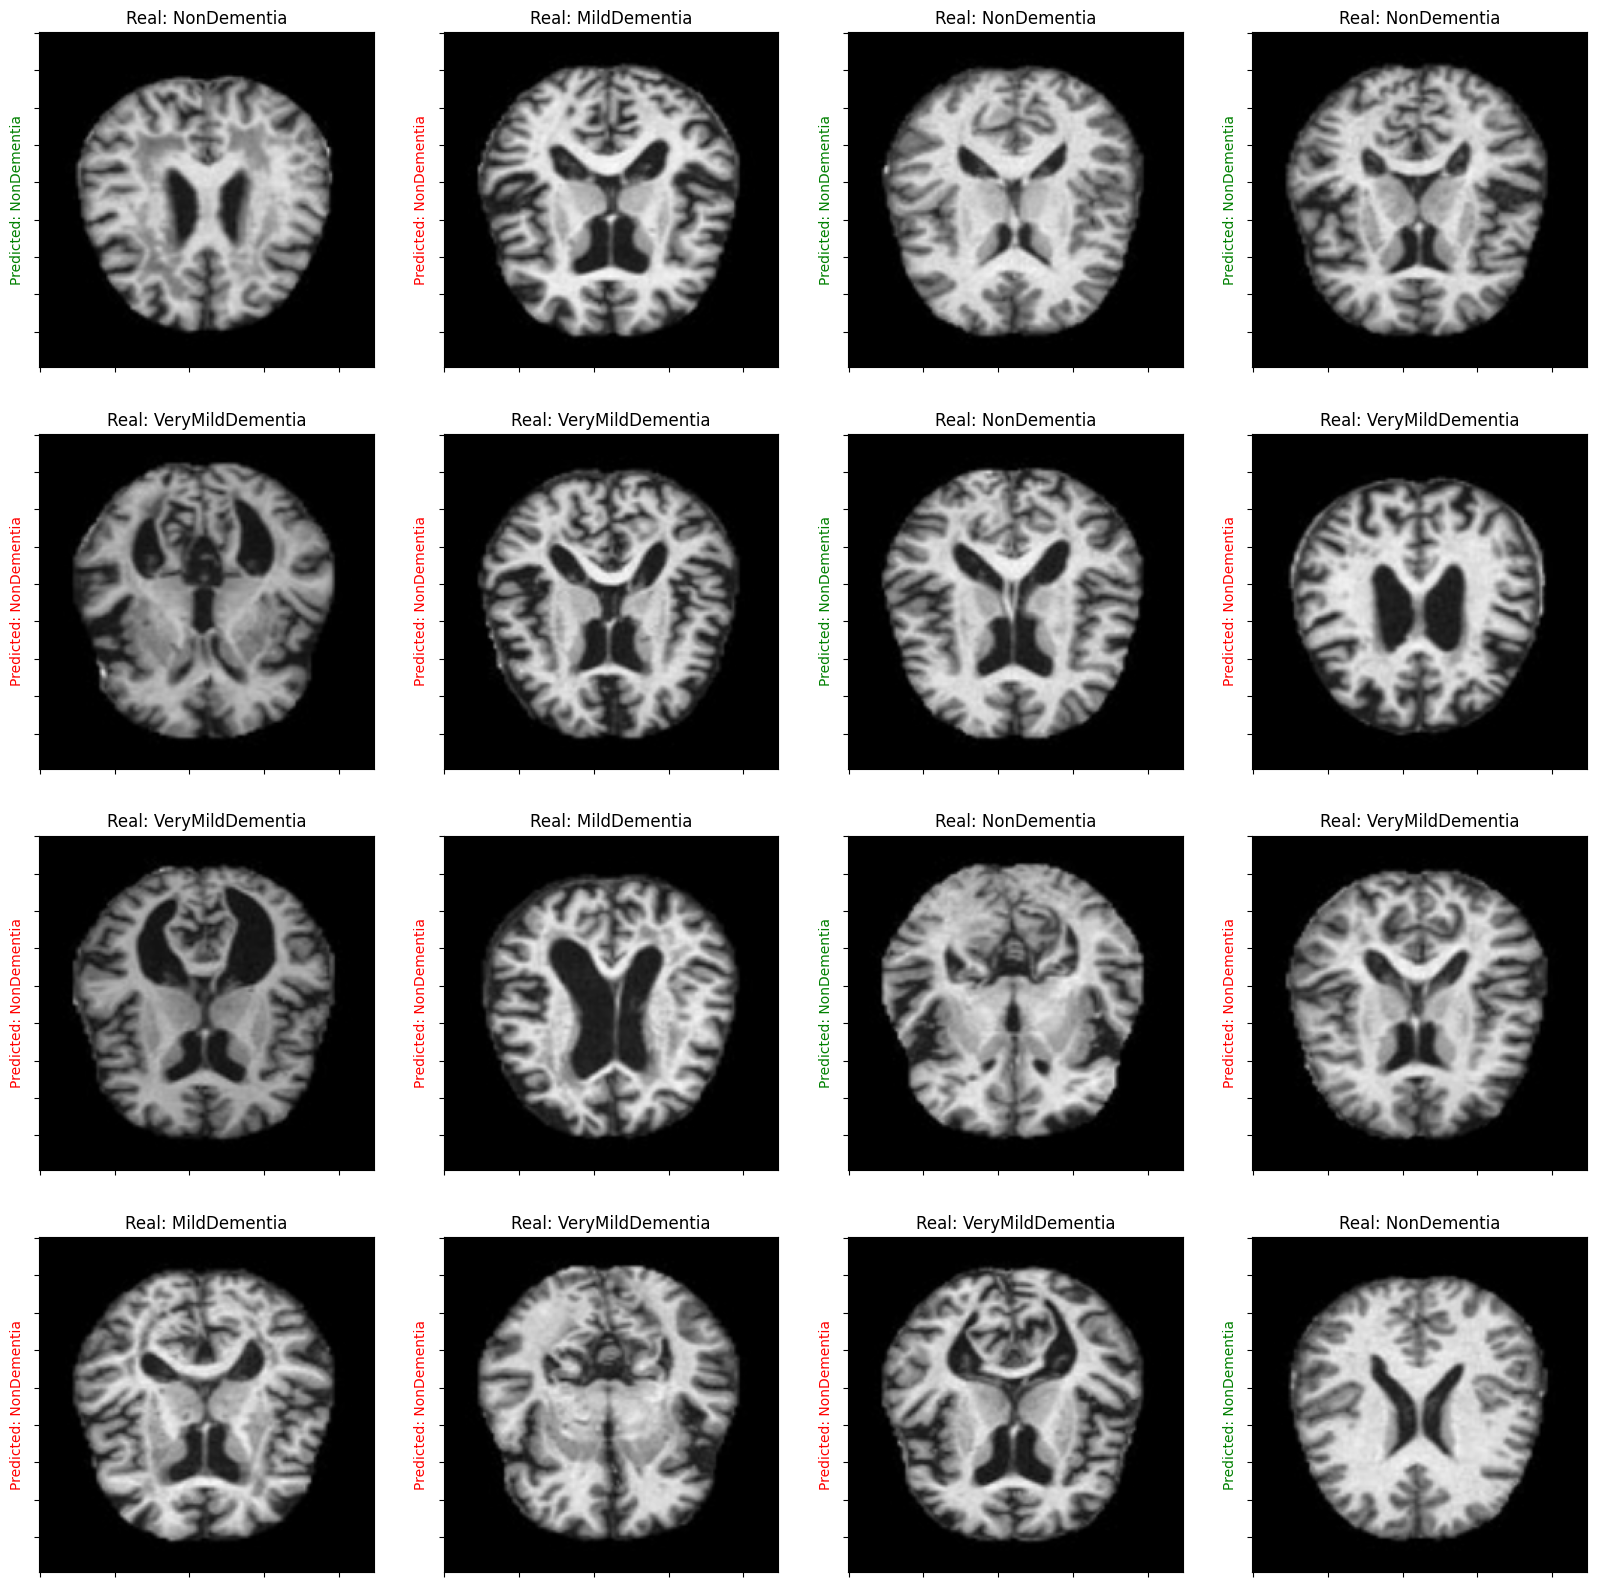

In [37]:

# Here we plot some of the test images and see how many of them are predicted correctly


label = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']

## predicting the type of dementia based on the model created 
plt.figure(figsize=(20, 20))
for images, labels in test_data.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(label[labels[i]]==label[np.argmax(score)]):
            plt.title("Real: "+label[labels[i]])
            plt.ylabel("Predicted: "+label[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Real: "+label[labels[i]])
            plt.ylabel("Predicted: "+label[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

        
plt.figure(figsize=(20, 20))
for images, labels in test_data.take(2):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(label[labels[i]]==label[np.argmax(score)]):
            plt.title("Real: "+label[labels[i]])
            plt.ylabel("Predicted: "+label[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Real: "+label[labels[i]])
            plt.ylabel("Predicted: "+label[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])
        

## SCROLL DOWN THE BELOW OUTPUTS TO SEE IMAGES
        


In [38]:
# again importing test_data, here I have marked Shuffle = False so that test data is imported in the same order
# as it is present in the folder 

test_data = tf.keras.preprocessing.image_dataset_from_directory('output/test',image_size=(224,224),batch_size=32,shuffle = False )

pred2 = model2.predict(test_data)
pred2

Found 642 files belonging to 4 classes.
21/21 [==============================] - 2s 97ms/step


array([[7.1154201e-01, 1.6880251e-04, 2.3487034e-01, 5.3418886e-02],
       [9.5700902e-01, 5.5295804e-05, 2.3029717e-02, 1.9905888e-02],
       [7.8983045e-01, 2.2627033e-05, 9.8554887e-02, 1.1159210e-01],
       ...,
       [1.5192785e-02, 5.2890297e-05, 3.7654197e-01, 6.0821235e-01],
       [9.2205204e-02, 1.5951172e-02, 2.3078351e-01, 6.6106009e-01],
       [9.9227823e-02, 9.2282257e-04, 5.8076635e-02, 8.4177274e-01]],
      dtype=float32)

In [39]:

# Changing the labels to one hot labels 

autotune = tf.data.experimental.AUTOTUNE

def one_hot_label(image, label):
    label = tf.one_hot(label, 4)
    return image, label


test_data = test_data.map(one_hot_label, num_parallel_calls=autotune)
test_data = test_data.cache().prefetch(buffer_size=autotune)

In [43]:
# finding ot how many pictures each folder or category has 

test_images = []
lbl = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
for label in lbl:
    dir_name = "/home/shrestha/output/test/" + label
    test_images.append(len([name for name in os.listdir(dir_name)]))


[90, 8, 320, 224]

In [41]:
# targets list
targets=[]
for i in range(0, len(test_images)):
    targets+=[i]*test_images[i]
targets=np.asarray(targets)
test_images, targets
targets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [42]:

## Classification report

from sklearn.metrics import classification_report
print(classification_report(targets, np.argmax(pred2, axis=1), target_names=lbl))



                    precision    recall  f1-score   support

     Mild_Demented       0.89      0.81      0.85        90
 Moderate_Demented       1.00      1.00      1.00         8
      Non_Demented       0.91      0.81      0.86       320
Very_Mild_Demented       0.72      0.86      0.79       224

          accuracy                           0.83       642
         macro avg       0.88      0.87      0.87       642
      weighted avg       0.84      0.83      0.83       642



In [46]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=targets , y_pred= np.argmax(pred2, axis=1))
print(confusion)

[[ 73   0   1  16]
 [  0   8   0   0]
 [  3   0 260  57]
 [  6   0  26 192]]


Text(0.5, 1.0, 'Confusion matrix detection of dementia stage')

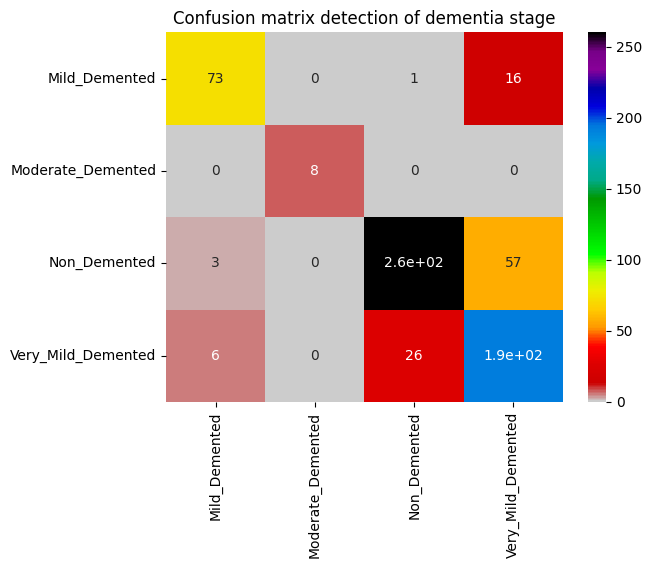

In [48]:
import seaborn as sns

plt.figure()

conf = sns.heatmap(confusion, xticklabels= lbl, yticklabels=lbl,annot = True, cmap = "nipy_spectral_r")

conf.set_title("Confusion matrix detection of dementia stage")

Some other CNN neural networks are even more better. But those models are computationally very expensive. Example - VGG16, VGG19, ResNet etc 